# Capítulo 10 - Análise Fatorial por Componentes Principais

# 10.1. Introdução

### Motivação

As técnicas exploratórias de **análise fatorial** são muito úteis quando há a intenção de se trabalhar com variáveis que apresentem, entre si, **coeficientes de correlação** relativamente elevados e se deseja estabelecer novas variáveis que captem o comportamento conjunto das variáveis originais. Cada uma dessas novas variáveis é chamada de **fator**, que pode ser entendido como o **agrupamento de variáveis** a partir de critérios estabelecidos.

### Análise Fatorial x Análise de Agrupamentos

Enquanto a análise de agrupamentos faz uso de medidas de distância ou de semelhança para agrupar observações e formar *clusters*, a análise fatorial utiliza coeficientes de correlação para agrupar variáveis e gerar fatores.

### O que é a Análise Fatorial?

Dentre os métodos para determinação de faotres, o conhecido como **componentes principais** é, sem dúvida, o mais utilizado em análise fatorial, já que se baseia no pressuposto de que podem ser extraídos **fatores não correlacionados** a partir de **combinações lineares das variáveis originais**. A análise fatorial por componentes principais (PCA) premite, portanto, que, a partir de um conjunto de variáveis originais correlacionadas entre si, seja determinado outro conjunto de variáveis (fatores) resultantes da combinação linear do primeiro conjunto.

### Objetivos Principais da Análise Fatorial

A análise fatorial por componentes principais apresenta quatro objetivos principais:
1. Identificação de correlação entre variáveis originais para a criação de fatores que representam a combinação linear daquelas variáveis (**redução estrutural**);
2. Verificação da **vaidade de constructos** previamente estabelecidos, tendo em vista a alocação das variáveis originais em cada fator;
3. **Elaboração de *rankings*** por meio da criação de indicadores de desempenho a partir dos fatores; e
4. Extração de fatores ortogonais para posterior uso em técnicas multivariadas confirmatórias que necessitam de **ausência de multicolinearidade**.

### O que é PCA?

O estatístico matemático e influente teórico econômico Harold Hotelling convencionou chamar, em 1933, de *Principal Component Analysis* a análise que determina componentes a partir da maximização da variância de dados originais.

# 10.2. Análise Fatorial por Componentes Principais

Muitos são os procedimentos inerentes à análise fatorial, com diferentes métodos para a determinação (**extração**) de fatores a partir da matriz de correlações de Pearson. O método mais utilizado é conhecido por componentes principais, em que a consequente redução estrutural é também chamada de **transformação de Karhunen-Loève**.

## 10.2.1. Correlação linear de Pearson e conceito de fator

Imaginemos um banco de dados que apresente $n$ observações e, para cada observação $i(i=1,\ldots,n)$, valores correspondentes a cada uma das $k$ variáveis métricas $X$, conforme mostra a Tabela 10.1.

**Tabela 10.1** Modelo geral de um banco de dados para elaboração fatorial

In [17]:
import pandas as pd

table_10_1 = pd.DataFrame({'Observação $i$': [1, 2, 3, '$\\vdots$', '$n$'], 
                           '$X_{1i}$': ['$X_{11}$', '$X_{12}$', '$X_{13}$', '$\\vdots$', '$X_{1n}$'],
                           '$X_{2i}$': ['$X_{21}$', '$X_{22}$', '$X_{23}$', '$\\vdots$', '$X_{2n}$'],
                           '$\\cdots$': ['$\\cdots$', '$\\cdots$', '$\\cdots$', '$\\ddots$', '$\\cdots$'],
                           '$X_{ki}$': ['$X_{k1}$', '$X_{k2}$', '$X_{k3}$', '$\\vdots$', '$X_{kn}$'],
                          })
table_10_1

,Observação $i$,$X_{1i}$,$X_{2i}$,$\cdots$,$X_{ki}$
0,1,$X_{11}$,$X_{21}$,$\cdots$,$X_{k1}$
1,2,$X_{12}$,$X_{22}$,$\cdots$,$X_{k2}$
2,3,$X_{13}$,$X_{23}$,$\cdots$,$X_{k3}$
3,$\vdots$,$\vdots$,$\vdots$,$\ddots$,$\vdots$
4,$n$,$X_{1n}$,$X_{2n}$,$\cdots$,$X_{kn}$


A partir do banco de dados, e cada a intenção de que sejam extraídos fatores a partir das $k$ variáveis $X$, devemos definir a **matriz de correlações** $\rho$ que apresenta os valores da **correlação linear de Pearson** entre cada par de variáveis, conforme mostra a expressão (10.1).

$$
\begin{equation}\tag{10.1}
\rho=\begin{pmatrix}
1 & \rho_{12} & \cdots & \rho_{1k}\\
\rho_{21} & 1 & \cdots & \rho_{2k}\\
\vdots & \vdots & \ddots & \vdots\\
\rho_{k1} & \rho_{k2} & \cdots & 1
\end{pmatrix}
\end{equation}
$$

A matriz de correlações $\rho$ é simétrica em relação à diagonal principal que, obviamente, apresenta valores iguais a 1. Para, por exemplo, as variáveis $X_1$ e $X_2$, a correlação de Pearson $\rho_{12}$ pode ser calculadas com base na expressão (10.2).

$$
\begin{equation}\tag{10.2}
\rho_{12}=\frac{\sum\limits_{i=1}^{n}(X_{1i}-\overline{X}_1)\cdot(X_{2i}-\overline{X}_2)}{\sqrt{\sum\limits_{i=1}^{n}(X_{1i}-\overline{X}_1)^2}\cdot\sqrt{\sum\limits_{i=1}^{n}(X_{2i}-\overline{X}_2)^2}}
\end{equation}
$$

em que $\overline{X}_1$ e $\overline{X}_2$ representam, respectivamente, as médias ds variáveis $X_1$ e $X_2$.

### Métrica da Correlação de Pearson

A correlação de Pearson é uma medida do grau da relação linear entre duas variáveis métricas, podendo variar entre -1 e 1, um valor mais próximo de um desses extremos indica a existência de relação linear entre as duas variáveis em análise, que, dessa forma, podem contribuir significativamente para a extração de um único fator. Por outro lado, um valor da correlação de Pearson muito próximo de 0 indica que a relação linear entre as duas variáveis é praticamente inexistente; portanto, diferentes fatores podem ser extraídos.

## 10.2.2. Adequação global da análise fatorial: estatística Kaiser-Meyer-Olkin (KMO) e teste de esfericidade de Bartlett

Uma adequada extração de fatores a partir de variáveis originais requer que a matriz de correlações $\rho$ apresente valroes relativamente elevados e estaticamente significantes. Embora a inspeção visual da matriz de correlações $\rho$ não revele se a extração de fatores será, de fato, adequada, uma quantidade substancial de valores inferiores a 0,30 representa um preliminar indício de que a análise fatorial poderá ser inapropriada.

Para que seja verificada a adequação global propriamente dita de extração de fatores, devemos recorrer à **estatística Kaiser-Meyer-Olkin (KMO)** e ao teste **teste de esfericidade de Barlett**.

### Estatística Kaiser-Meyer-Olkin (KMO)

A estatística KMO fornece a proporção de variância considera comum a todas as variáveis na amostra em análise, ou seja, que pode ser atribuída à existência de um fator comum. Essa estatística varia de 0 a 1, e, enquanto valores mais próximos de 1 indicam que as variáveis compartilham um percentual de variância bastante elevado (correlações de Pearson altas), valores mais próximos de 0 são decorrentes de correlações de Pearson baixas entre as variáveis, o que pode indicar que a análise fatorial será inadequada. A estatística KMO, apresenta inicialmente por Kaiser (1970), pode ser calculada por meio da expressão (10.3).

$$
\begin{equation}\tag{10.3}
\text{KMO}=\frac{\sum\limits_{l=1}^{k}\sum\limits_{c=1}^{k}\rho_{lc}^2}{\sum\limits_{l=1}^{k}\sum\limits_{c=1}^{k}\rho_{lc}^2+\sum\limits_{l=1}^{k}\sum\limits_{c=1}^{k}\varphi_{lc}^2},l\neq c
\end{equation}
$$

em que $l$ e $c$ representam, respectivamente, as linhas e colunas da matriz de correlações $\rho$, e os termos $\varphi$ representam os **coeficientes de correlação parcial** entre duas variáveis. Enquanto os coeficientes de correlação de Pearson $\rho$ são também chamados de **coeficientes de correlação de ordem zero**, os coeficientes de correlação parcial $\varphi$ são também conhecidos por **coeficientes de correlação de ordem superior**. Para três variáveis, são também chamados de **coeficientes de correlação de primeira ordem**, para quatro variáveis, de **coeficientes de correlação de segunda ordem** e assim sucessivamente.

O Quadro 10.1 apresenta, segundo critério já bastante aceito na literatura, um indicativo sobre a relação entre a estatística KMO e a adequação da análise fatorial.

**Quadro 10.1** Relação entre a estística KMO e a adequação global da análise fatorial.
|Estatística KMO|Adequação Global da Análise Fatorial|
|:-:|:-:|
|Entre 1,00 e 0,90|Muito boa|
|Entre 0,90 e 0,80|Boa|
|Entre 0,80 e 0,70|Média|
|Entre 0,70 e 0,60|Razoável|
|Entre 0,60 e 0,50|Má|
|Menor do que 0,50|Inaceitável|

### Teste de Esfericidade de Bartlett

O teste de esfericidade de Bartlett consiste em comparar a matriz de correlações $\rho$ com uma matriz identidade $\mathbf{I}$ de mesma dimensão. Se as diferenças entre os valores correspondentes fora da diagonal principal de cada matriz não forem estatisticamente diferentesde 0, a determinado nível de significância, poderemos considerar que a extração dos fatores não será adequada. Nesse caso, em outras palavras, as correlações de Pearson entre cada par de variáveis são estatisticamente iguais a 0, o que invibiliza qualquer tentativa de extração de fatores a partir das variáveis originais. Logo, podemos definir as hipóteses nula e alternativa do teste de esfericidade de Bartlett da seguinte maneira:

$$
H_0:\rho = \begin{pmatrix}
1 & \rho_{12} & \cdots & \rho_{1k} \\
\rho_{21} & 1 & \cdots & \rho_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
\rho_{k1} & \rho_{k2} & \cdots & 1
\end{pmatrix} = \mathbf{I} = \begin{pmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{pmatrix}
$$

$$
H_1:\rho = \begin{pmatrix}
1 & \rho_{12} & \cdots & \rho_{1k} \\
\rho_{21} & 1 & \cdots & \rho_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
\rho_{k1} & \rho_{k2} & \cdots & 1
\end{pmatrix} \neq \mathbf{I} = \begin{pmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{pmatrix}
$$

A estatística correspondent ao teste de esfericidade de Bartlett é uma estatística $\chi^2$, que apresenta a seguinte expressão:

$$
\begin{equation}\tag{10.9}
\chi^2=-\left[(n-1)-\left(\frac{2\cdot k+5}{6}\right)\cdot\ln|D|\right]
\end{equation}
$$

com $\frac{k\cdot(k-1)}{2}$ graus de liberdade. Sabemos que $n$ é o tamanho da amostra, e $k$, o número de variáveis. Além disso, $D$ representa o determinante da matriz de correlações $\rho$.

O teste de esfericidade de Bartlett permite, portanto, que verifiquemos, para determinado número de graus de liberdade e determinado nível de significância, se o valor total da estatística $\chi_{\text{Bartlett}}^2$ é maior que o valor crítico da estatística. Se for o caso, poderemos afirmar que as correlações de Pearson são estatisticamente diferentes de 0 e que, portanto, podem ser extraídos fatores a partir das variáveis originais, sendo a análise fatorial apropriada.

Como o *p-value* é menor que 5% de significância, podemos rejeitar a hipótese nula e aderir a hipótese alternativa.

### Teste de Esfericidade de Bartlett x Estatística KMO

Ressalta-se que deve ser sempre preferido o teste de esfericidade de Bartlett à estatística KMO para efeitos de decisão sobre a adequação global da análise fatorial, visto que, enquanto o primeiro é um teste com determinado nível de significância, o segundo é apenas um coeficiente (estatística) calculado sem distribuição de probabilidades determinada e hipóteses que permitam avaliar o nível correspondente de significância para efeitos de decisão.

## 10.2.3 Definição dos fatores por componentes principais: determinação dos autovalores e autovetores da matriz de correlações $\rho$ e cálculo dos *scores* fatoriais

Como um fator representa a combinação linear de variáveis originais, podemos definir, para $k$ variáveis, um número máximo de $k$ fatores $(F_1,F_2,\ldots,F_k)$, de maneira análoga à quantidade máxima de agrupamentos que podem ser definidos a partir de uma amostra com $n$ observações. Dessa forma, para $k$ variáveis, temos:

$$
\begin{equation}\tag{10.10}
\begin{array}{c}
F_{1i}=s_{11}\cdot X_{1i}+s_{21}\cdot X_{2i}+\cdots+s_{k1}\cdot X_{ki}\\
F_{2i}=s_{12}\cdot X_{1i}+s_{22}\cdot X_{2i}+\cdots+s_{k2}\cdot X_{ki}\\
\vdots\\
F_{ki}=s_{1k}\cdot X_{1i}+s_{2k}\cdot X_{2i}+\cdots+s_{kk}\cdot X_{ki}
\end{array}
\end{equation}
$$

em que os termos são conhecidos por ***scores* fatoriais**, que representam os parâmetros de um modelo linear que relaciona determinado fator com as variáveis originais. O cálculo dos *scores* fatoriais é de fundamental importância dentro do contexto da técnica de análise fatorial e é elaborado a partir da determinação dos autovalores e autovetores da matriz de correlações $\rho$. Na expressão (10.11), reproduzimos a matriz de correlações $\rho$ já apresentada na expressão (10.1).

$$
\begin{equation}\tag{10.11}
\rho=\begin{pmatrix}
1 & \rho_{12} & \cdots & \rho_{1k}\\
\rho_{21} & 1 & \cdots & \rho_{2k}\\
\vdots & \vdots & \ddots & \vdots\\
\rho_{k1} & \rho_{k2} & \cdots & 1
\end{pmatrix}
\end{equation}
$$

Essa matriz de correlações, com dimensões $k\times k$, apresenta $k$ autovalores $\lambda^2\ (\lambda_1^2\geq\lambda_2^2\geq\ldots\geq\lambda_k^2$, que podem ser obtidos a partir da solução da seguinte equação:

$$
\begin{equation}\tag{10.12}
\det(\lambda^2\cdot\mathbf{I}-\rho)=0
\end{equation}
$$

em que $\mathbf{I}$ é a matriz identidade, também com dimensões $k\times k$.

Como determinado fator representa o resultado do agrupamento de variáveis, é importante ressaltar que: 

$$
\begin{equation}\tag{10.13}
\lambda_1^2+\lambda_2^2+\cdots+\lambda_k^2=k
\end{equation}
$$

A epxressão (10.12) pode ser reescrita da seguinte maneira:

$$
\begin{equation}\tag{10.14}
\begin{vmatrix}
\lambda^2-1 & -\rho_{12} & \cdots & -\rho_{1k}\\
-\rho_{21} & \lambda^2-1 & \cdots & -\rho_{2k}\\
\vdots & \vdots & \ddots & \vdots\\
-\rho_{k1} & -\rho_{k2} & \cdots & \lambda^2-1
\end{vmatrix}=0
\end{equation}
$$

de onde podemos definir a matriz de autovalores $\Lambda^2$ da seguinte forma:

$$
\begin{equation}\tag{10.15}
\Lambda^2=\begin{pmatrix}
\lambda_1^2 & 0 & \cdots & 0\\
0 & \lambda_2^2 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & \lambda_k^2
\end{pmatrix}
\end{equation}
$$

Para que sejam definidos os autovetores da matriz $\rho$ com base nos autovalores, devemos resolver os seguintes sistemas de equação para cada autovalor $\lambda^2\ (\lambda_1^2\geq\lambda_2^2\geq\ldots\geq\lambda_k^2)$:

### Autovetores e Autovalores

#### Determinação de Autovetores $v_{11}, v_{21},\ldots,v_{k2}$ a partir do Primeiro Autovalor ($\lambda_1^2$):

$$
\begin{equation}\tag{10.16}
\begin{pmatrix}
\lambda_1^2-1 & -\rho_{12} & \cdots & -\rho_{1k}\\
-\rho_{21} & \lambda_1^2-1 & \cdots & -\rho_{2k}\\
\vdots & \vdots & \ddots & \vdots\\
-\rho_{k1} & -\rho_{k2} & \cdots & \lambda_1^2-1
\end{pmatrix}\cdot
\begin{pmatrix}
v_{11}\\
v_{21}\\
\vdots\\
v_{k1}
\end{pmatrix}=
\begin{pmatrix}
0\\
0\\
\vdots\\
0
\end{pmatrix}
\end{equation}
$$

de onde vem que:

$$
\begin{equation}\tag{10.17}
\left\{
\begin{array}{c}
(\lambda_1^2-1)\cdot v_{11}-\rho_{12}\cdot v_{21}\cdots -\rho_{1k}\cdot v_{k1}=0\\
-\rho_{21}\cdot v_{11}+(\lambda_1^2-1)\cdot v_{21}\cdots -\rho_{2k}\cdot v_{k1}=0\\
\vdots\\
-\rho_{k1}\cdot v_{11}-\rho_{k2}\cdot v_{21}+(\lambda_1^2-1)\cdot v_{k1}=0
\end{array}
\right.
\end{equation}
$$

#### Determinação de Autovetores $v_{12}, v_{22},\ldots,v_{k2}$ a partir do Primeiro Autovalor ($\lambda_2^2$):

$$
\begin{equation}\tag{10.18}
\begin{pmatrix}
\lambda_2^2-1 & -\rho_{12} & \cdots & -\rho_{1k}\\
-\rho_{21} & \lambda_2^2-1 & \cdots & -\rho_{2k}\\
\vdots & \vdots & \ddots & \vdots\\
-\rho_{k1} & -\rho_{k2} & \cdots & \lambda_2^2-1
\end{pmatrix}\cdot
\begin{pmatrix}
v_{12}\\
v_{22}\\
\vdots\\
v_{k2}
\end{pmatrix}=
\begin{pmatrix}
0\\
0\\
\vdots\\
0
\end{pmatrix}
\end{equation}
$$

de onde vem que:

$$
\begin{equation}\tag{10.19}
\left\{
\begin{array}{c}
(\lambda_2^2-1)\cdot v_{12}-\rho_{12}\cdot v_{22}\cdots -\rho_{1k}\cdot v_{k2}=0\\
-\rho_{21}\cdot v_{12}+(\lambda_2^2-1)\cdot v_{22}\cdots -\rho_{2k}\cdot v_{k2}=0\\
\vdots\\
-\rho_{k1}\cdot v_{12}-\rho_{k2}\cdot v_{22}+(\lambda_2^2-1)\cdot v_{k2}=0
\end{array}
\right.
\end{equation}
$$

#### Determinação de Autovetores $v_{1k}, v_{2k},\ldots,v_{kk}$ a partir do Primeiro Autovalor ($\lambda_k^2$):

$$
\begin{equation}\tag{10.20}
\begin{pmatrix}
\lambda_k^2-1 & -\rho_{12} & \cdots & -\rho_{1k}\\
-\rho_{21} & \lambda_k^2-1 & \cdots & -\rho_{2k}\\
\vdots & \vdots & \ddots & \vdots\\
-\rho_{k1} & -\rho_{k2} & \cdots & \lambda_k^2-1
\end{pmatrix}\cdot
\begin{pmatrix}
v_{1k}\\
v_{2k}\\
\vdots\\
v_{kk}
\end{pmatrix}=
\begin{pmatrix}
0\\
0\\
\vdots\\
0
\end{pmatrix}
\end{equation}
$$

de onde vem que:

$$
\begin{equation}\tag{10.21}
\left\{
\begin{array}{c}
(\lambda_k^2-1)\cdot v_{1k}-\rho_{12}\cdot v_{2k}\cdots -\rho_{1k}\cdot v_{k1}=0\\
-\rho_{21}\cdot v_{1k}+(\lambda_k^2-1)\cdot v_{2k}\cdots -\rho_{2k}\cdot v_{k1}=0\\
\vdots\\
-\rho_{k1}\cdot v_{1k}-\rho_{k2}\cdot v_{2k}+(\lambda_k^2-1)\cdot v_{kk}=0
\end{array}
\right.
\end{equation}
$$

### *Scores* Fatoriais

Dessa forma, podemos calcular os *scores* fatoriais de cada fator com base na determinação dos autovalores e autovetores da matriz de correlações $\rho$. Os vetores dos $scores$ fatoriais podem ser definidos da seguinte forma:

#### *Scores* Fatoriais do Primeiro Fator:

$$
\begin{equation}\tag{10.22}
\mathbf{S}_1=\begin{pmatrix}
s_{11}\\
s_{21}\\
\vdots\\
s_{k1}
\end{pmatrix}=\begin{pmatrix}
\frac{v_{11}}{\sqrt{\lambda_1^2}}\\
\frac{v_{21}}{\sqrt{\lambda_1^2}}\\
\vdots\\
\frac{v_{k1}}{\sqrt{\lambda_1^2}}
\end{pmatrix}
\end{equation}
$$

#### *Scores* Fatoriais do Segundo Fator:

$$
\begin{equation}\tag{10.23}
\mathbf{S}_2=\begin{pmatrix}
s_{12}\\
s_{22}\\
\vdots\\
s_{k2}
\end{pmatrix}=\begin{pmatrix}
\frac{v_{12}}{\sqrt{\lambda_2^2}}\\
\frac{v_{22}}{\sqrt{\lambda_2^2}}\\
\vdots\\
\frac{v_{k2}}{\sqrt{\lambda_2^2}}
\end{pmatrix}
\end{equation}
$$

#### *Scores* Fatoriais do $k$-ésimo Fator:

$$
\begin{equation}\tag{10.23}
\mathbf{S}_k=\begin{pmatrix}
s_{1k}\\
s_{2k}\\
\vdots\\
s_{kk}
\end{pmatrix}=\begin{pmatrix}
\frac{v_{1k}}{\sqrt{\lambda_k^2}}\\
\frac{v_{2k}}{\sqrt{\lambda_k^2}}\\
\vdots\\
\frac{v_{kk}}{\sqrt{\lambda_k^2}}
\end{pmatrix}
\end{equation}
$$

### Fatoriais

Como os *scores* fatoriais de cada fator são padronizados pelos respectivos autovalores, os fatores do conjunto de equações apresentado na expressão (10.0) devem ser obtidos pela multiplicação de cada *score* fatorial pela correspondente variável original, padronizada por meio do procedimento *Zscores*. Dessa forma, podemos obter cada um dos fatores com base nas seguintes equações:

$$
\begin{equation}
\begin{array}{l}
F_{1i}=\frac{v_{11}}{\sqrt{\lambda_1^2}}\cdot ZX_{1i}+\frac{v_{21}}{\sqrt{\lambda_1^2}}\cdot ZX_{2i}+\cdots+\frac{v_{k1}}{\sqrt{\lambda_1^2}}\cdot ZX_{ki}\\
F_{1i}=\frac{v_{12}}{\sqrt{\lambda_2^2}}\cdot ZX_{1i}+\frac{v_{22}}{\sqrt{\lambda_2^2}}\cdot ZX_{2i}+\cdots+\frac{v_{k2}}{\sqrt{\lambda_2^2}}\cdot ZX_{ki}\\
F_{1i}=\frac{v_{1k}}{\sqrt{\lambda_k^2}}\cdot ZX_{1i}+\frac{v_{2k}}{\sqrt{\lambda_k^2}}\cdot ZX_{2i}+\cdots+\frac{v_{kk}}{\sqrt{\lambda_k^2}}\cdot ZX_{ki}
\end{array}
\end{equation}
$$

em que $ZX_i$ representa o valor padronizado de cada variável $X$ para determinada observação $i$. Ressalta-se que todos os fatores extraídos apresentam, entre si, correlações de Pearson iguais a 0, ou seja, **são ortogonais entre si**.

#### Quantidade de Fatores a Serem Extraídos 

Embora o pesquisador tenha liberdade para definir, de forma preliminarm a quantidade de fatores a serem extraídos da análise, visto que pode ter a intenção de verificar, por exemplo, a validade de um constructo previamente estabelecido (procedimento conhecido por **critério *a priori***, é de fundalmental importância que seja feita uma análise bom base na magnitude dos autovalores calculados a partir da matriz de correlações $\rho$.

##### Relação Autovalores e Percentual de Variância

Como os autovalores correspondem ao percentual de variância compartilhada pelas variáveis originais para a formação de cada fator, como $\lambda_1^2\geq\lambda_2^2\geq\ldots\lambda_k^2$ e sabendo-se que os fatores $F_1,F_2,\ldots,F_k$ são obtidos a partir dos respectivos autovalores, fatores extraídos a partir de autovalores menores são formados a partir de menores percentuais de variância compartilhada pelas variáveis originais. Visto que um fator representa determinado agrupamento de variáveis, fatores extraídos a partir de autovalores menores que 1 possivelmente não conseguem representar o comportamento de sequer uma variável original (claro que para a regra existem e exceções, que ocorrem para os casos em que determinado autovalor é menor mas muito próximo a 1).

##### Conclusão sobre Quantidade de Fatores

O critério de escolha da quantidade de fatores, em que são levados em consideração apenas os fatores correspondentes a autovalores maiores que 1, é comumente utilizado e conhecido por **critério da raiz latente** ou **critério de Kaiser**.

#### Outros Métodos de Extração de Fatores

O método para extração de fatores mais conhecido é o componentes principais, e o primeiro fator $F_1$, formado pelo maior percentual de variância compartilhada pelas variáveis originais, é também chamado de **fator principal**. Esse método é profundamente referenciado na literatura e utilizado na prática quando o pesquisador deseja elaborar uma redução estrutural dos dados para a criação de fatores ortogonais, definir *rankings* de observação por meio dos fatores gerados e até mesmo verificar a validade de constructos previamente estabelecidos. 

Outros métodos para extração dos fatores, como aqueles conhecidos por **mínimos quadrados generalizados**, **mínimos quadrados ponderados**, **máxima verossimilhança**, ***alpha factoring*** e ***image factoring***, apresentam diferentes critérios e determinadas particularidades.

## 10.2.4 Cargas fatoriais e comunalidades

Estabelecido os fatores, podemos definir as **cargas fatoriais**, que nada mais são que **correlações de Pearson entre as variáveis originais e cada um dos fatores**. A Tabela 10.2 apresenta as cargas fatoriais para cada par variável-fator.

**Tabela 10.2** Cargas fatoriais entre variáveis originais e fatores.
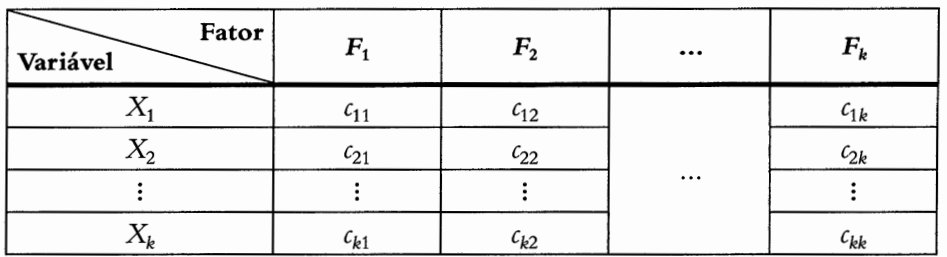

Com base no critério da raiz latente (em que são considerados apenas fatores oriundos de autovalores maiores que 1), é de se supor que as cargas fatoriais entre os fatores correspondentes a autovalores menores que 1 e todas as variáveis originais sejam baixas, visto que já terão apresentado correlações de Pearson (cargas) mais elevadas com fatores extraídos anteriormente a partir de autovalores maiores. Do mesmo modo, variáveis originais que compartilhem apenas uma pequena parcela de variância com as demais variáveis apresentarão cargas fatoriais elevadas apenas em um único fator. Caso isso ocorra para todas as variáveis originais, não existirão diferenças significativas entre a matriz de correlações $\rho$ e a matriz identidade $\mathbf{I}$, tornando a estatística $\chi_{\text{Bartlett}}^2$ muito baixa. Esse fato permite afirmar que a análise fatorial será inapropriada, e, nessa situação, o pesquisador poderá optar por não extrair fatores a partir das variáveis originais.

Como as cargas fatoriais são as correlações de Pearson entre cada variável e cada fator, a somatória dos quadrados dessas cargas será sempre igual a 1, visto que cada variável compartilha parte do seu percentual de variância com todos os $k$ fatores, e a somatória dos percentuais de variância (cargas fatoriais ou correlações de Pearson ao quadrado) será 100%.

### Comunalidades

Por outro lado, caso seja extraída uma quantidade de fatores menor que $k$, em função do critério da raiz latente, a somatória dos quadrados das cargas fatoriais em cada linha não chegará a ser igual a 1. A essa somatória, dá-se o nome de **comunalidade**, que representa a **variância total compartilhada de cada variável em todos os fatores extraídos a partir de autovalores maiores que 1**. Logo, podemos escrever que:

$$
\begin{equation}\tag{10.29}
\begin{array}{c}
c_{11}^2+c_{12}^2+\ldots=\text{comunalidade }X_1\\
c_{21}^2+c_{22}^2+\ldots=\text{comunalidade }X_2\\
\vdots\\
c_{k1}^2+c_{k2}^2+\ldots=\text{comunalidade }X_k
\end{array}
\end{equation}
$$

O objetivo principal da análise das comunalidades é verificar se alguma variável acaba por não compartilhar um significativo percentual de variância com os fatores extraídos. Embora não haja um ponto de corte a partir do qual determinada comunalidade possa ser considerada alta ou baixa, visto que o tamanho da amostra pode interferir nesse julgamento, a existência de comunalidades consideravelmente baixas em relação às demais pode sugerir que o pesquisador reconsidere a inclusão da respectiva variável na análise fatorial.

Logo definidos os fatoers com base nos *scores* fatoriais, podemos afirmar que as cargas fatoriais serão exatamente iguais aos parâmetros estimados de um modelo de regressão linear múltipla que apresenta, como variável dependente, determinada variável padronizada $ZX$ e, como variáveis explicativas, os próprios fatores, sendo o **coeficiente de ajuste $\mathbf{R}^2$** de cada modelo igual à própria comunalidade da respectiva variável original.

A somatória dos quadrados das cargas fatoriais em cada coluna da Tabela 10.2, por outro lado, será igual ao respectivo autovalor, visto que a razão entre cada autovalor e a quantidade total de variáveis pode ser entendida como o percentual de variância compartilhada por todas as $k$ variáveis originais para a formação de cada fator.

Logo, podemos escrever que:

$$
\begin{equation}\tag{10.30}
\begin{array}{c}
c_{11}^2+c_{21}^2+\ldots+c_{k1}^2=\lambda_1^2\\
c_{12}^2+c_{22}^2+\ldots+c_{k2}^2=\lambda_2^2\\
\vdots\\
c_{1k}^2+c_{2k}^2+\ldots+c_{kk}^2=\lambda_k^2
\end{array}
\end{equation}
$$

Após a determinação dos fatores e do cálculo das cargas fatoriais, é possível ainda que algumas variáveis apresentem correlações de Pearson (cargas fatoriais) intermediárias (nem tão altas, nem tão baixas) com todos os fatores extraídos, embora sua comunalidade não seja relativamente tão baixa. Nesse caso, embora a solução da análise faotiral já tenha sido obtida de forma adequada e considerada finalizda, o pesquisador pode, para os casos em que a tabela de cargas fatoriais apresentar valores intermediários para uma ou mais variáveis em todos os fatores, elaborar uma rotação desses fatores, a fim de que sejam aumentadas as correlaçãos de Pearson entre as variáveis originais e novos fatores gerados.

## 10.2.5 Rotação de fatores

Imaginemos novamente uma situação hipotética em que determinado banco de dados apresenta apenas três variáveis $(k=3)$. Após a elaboração da análise fatorial por componentes principais, são extraídos dois fatores, ortogonais entre si, com cargas fatoriais (correlações de Pearson) com cada uma das três variáveis originais, de acordo com a Tabela 10.3.

**Tabela 10.3** Cargas fatoriais entre três variáveis e dois fatores.

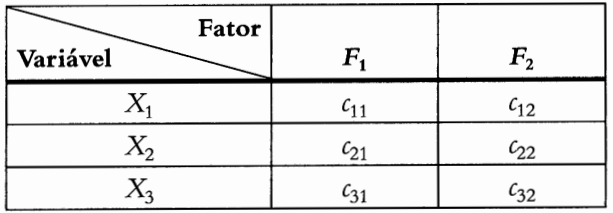

A fim de que possa ser elaborado um gráfico com as posições relativas de cada variável em cada fator (gráfico conhecido como ***loading plot***), podemos considerar as cargas fatoriais coordenadas (abcissas e ordenadas) das variáveis em um plano cartensiano formado pelos dois fatores ortogonais. Esse gráfico encontra-se, de maneira exemplificada, na Figura 10.5.

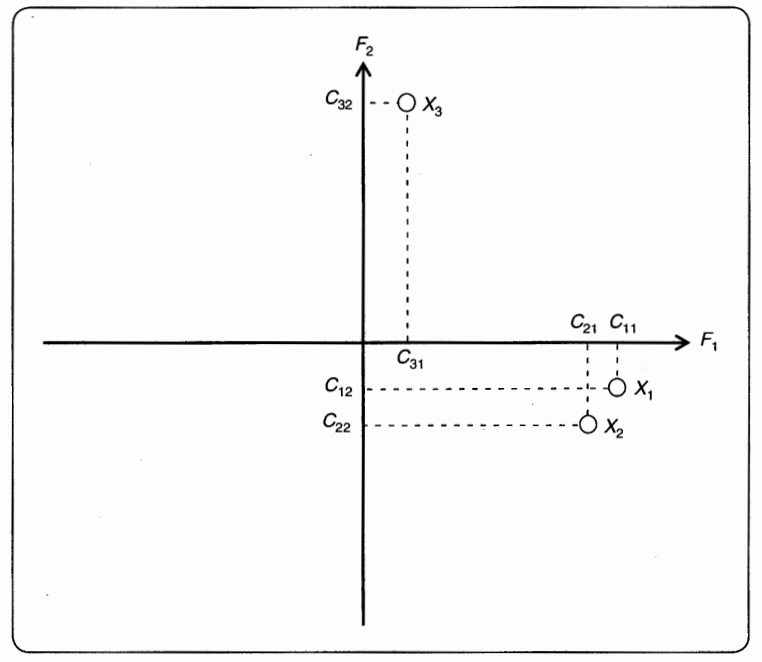

**Figura 10.5** *Loading plot* para situação hipotética com três variáveis e dois fatores.

Para que tenhamos melhor visualização das variáveis mais representadas por determinado fator, podemos pensar em uma rotação, em torno da origem, dos fatores originalmente extraídos $F_1$ e $F_2$, de modo a aproximar os pontos correspondentes às variáveis $X_1$, $X_2$ e $X_3$ de um dos novos fatores, chamados de **fatores rotacionados** $F'_1$ e $F'_2$. A Figura 10.6 apresenta essa situação de forma exemplificada.

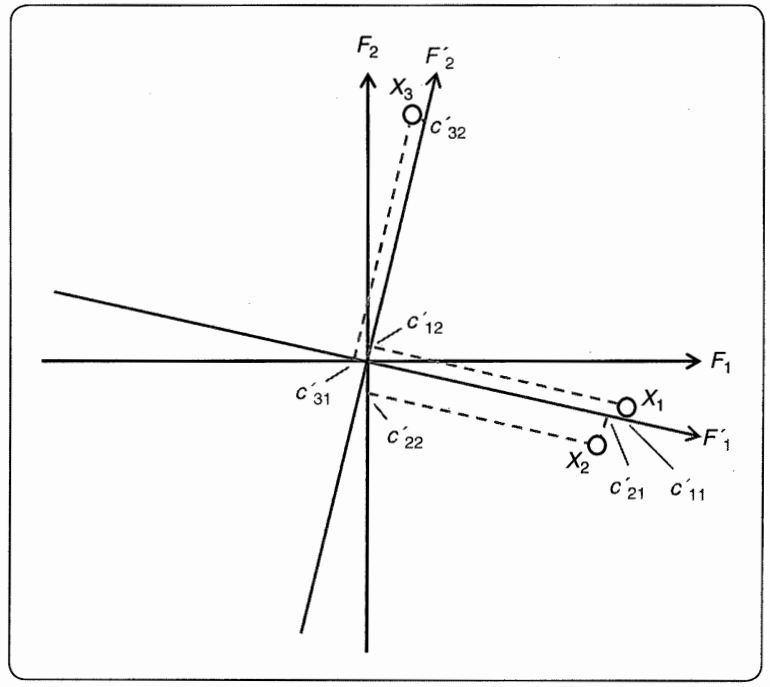

**Figura 10.6** Definição dos fatores rotacionados a partir dos fatores originais.

Com base na Figura 10.6, podemos verificar, para cada variável em análise, que, enquanto a carga para um fator é aumentada, para o outro, é diminuída. A Tabela 10.4 mostra a redistribuição de cargas para nossa situação hipotética.

**Tabela 10.4** Cargas fatoriais originais e rotacionadas para a nossa situação hipotética.

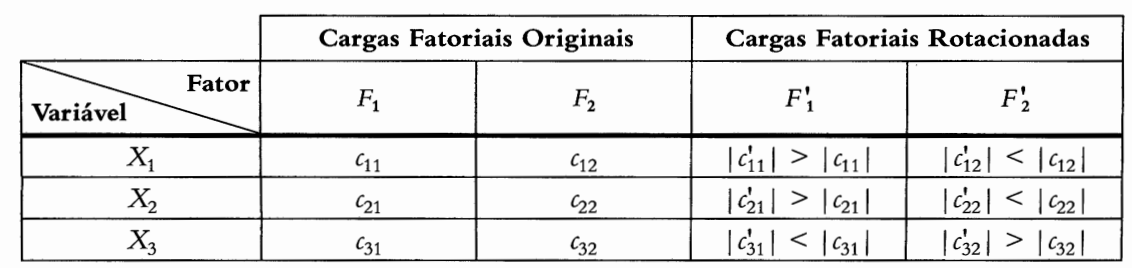

Logo, para uma situação genérica, podemos afirmar que a rotação é um procedimento que maximiza as cargas de cada variável em determinado fator, em detrimento dos demais. Nesse sentido, o efeito final da rotação é a redistribuição das cargas fatoriais para fatores que inicialmente apresentavam menores percentuais de variância compartilhada por todas as variáveis originais. O objetivo principal é minimizar a quantidade de variáveis com altas cargas em determinado fator, já que cada um dos fatores passará a ter cargas mais expressivas somente com algumas das variáveis originais. Consequentemente, a rotação pode simplificar a interpretação dos fatores.

Embora as comunalidades e o percentual total de variância compartilhada por todas as variáveis em todos os fatores não sejam alterados com a rotação (tampouco as estatísticas KMO e $\chi_{\text{Bartlett}}^2$, o percentual de variância compartilhada pelas variáveis originais em cada fator é redistribuiído e, portanto, alterado. Em outras palavras, são determinados novos autovalores $\lambda'\ (\lambda'_1,\lambda'_2,\ldots,\lambda'_k)$ a partir das **cargas fatoriais rotacionadas**. Assim, podemos escrever que: 

$$
\begin{equation}\tag{10.31}
\begin{array}{l}
c_{11}^{'2} + c_{12}^{'2} + \ldots = \text{comunalidade } X_1 \\
c_{21}^{'2} + c_{22}^{'2} + \ldots = \text{comunalidade } X_2 \\
\vdots \\
c_{k1}^{'2} + c_{k2}^{'2} + \ldots = \text{comunalidade } X_k
\end{array}
\end{equation}
$$

e que:

$$
\begin{equation}\tag{10.32}
\begin{array}{c}
c_{11}^{'2}+c_{21}^{'2}+\ldots+c_{k1}^{'2}=\lambda_1^{'2}\neq\lambda_1^2\\
c_{12}^{'2}+c_{22}^{'2}+\ldots+c_{k2}^{'2}=\lambda_2^{'2}\neq\lambda_2^2\\
\vdots\\
c_{1k}^{'2}+c_{2k}^{'2}+\ldots+c_{kk}^{'2}=\lambda_k^{'2}\neq\lambda_k^2
\end{array}
\end{equation}
$$

mesmo sendo respeitada a expressão (10.13), ou seja:

$$
\begin{equation}\tag{10.33}
\lambda_1^2+\lambda_2^2+\ldots+\lambda_k^2=\lambda_1^{'2}+\lambda_2^{'2}+\ldots+\lambda_k^{'2}=k
\end{equation}
$$

Além disso, a partir da rotação dos fatores, são obtidos novos ***scores* fatoriais rotacionados**, $s'$, de modo que as expressões finais dos fatores rotacionados serão:

$$
\begin{equation}\tag{10.34}
\begin{array}{c}
F'_{1i}=s'_{11}\cdot X_{1i}+s'_{21}\cdot X_{2i}+\cdots+s'_{k1}\cdot X_{ki}\\
F'_{2i}=s'_{12}\cdot X_{1i}+s'_{22}\cdot X_{2i}+\cdots+s'_{k2}\cdot X_{ki}\\
\vdots\\
F'_{ki}=s'_{1k}\cdot X_{1i}+s'_{2k}\cdot X_{2i}+\cdots+s'_{kk}\cdot X_{ki}
\end{array}
\end{equation}
$$

É importante ressaltar que a adequação global da análise fatorial (estatística KMO e teste de esfericidade de Bartlett) não é alterada com a rotação, já que a matriz de correlações $\rho$ continua a mesma.

Embora existam diversos métodos de rotação fatorial, o mais utilizado é o **método de rotação ortogonal** conhecido por **Varimax**, cuja principal finalidade é minimizar a quantidade de variáveis que apresentam elevadas cargas em determinado fator por meio da redistribuição das cargas fatoriais e maximização da variância compartilhada em fatores correspondentes a autovalores mais baixos. Daí decorre a nomenclatura Varimax, proposta por Kaiser (1958).

O algoritmo por trás do método de rotação Varimax consiste em determinar um ângulo de rotação $\theta$ em que pares de fatores são rotacionados igualmente. Logo, conforme discute Harman (1968), para determinado par de fatores $F_1$ e $F_2$, por exemplo, as cargas fatoriais rotacionadas $c'$ entre os dois fatores e as $k$ variáveis originais são obtidas a partir das cargas fatoriais originais $c$, por meio da seguinte multiplicação matricial:

$$
\begin{equation}\tag{10.35}
\begin{pmatrix}
c_{11} & c_{12}\\
c_{21} & c_{22}\\
\vdots & \vdots\\
c_{k1} & c_{k2}
\end{pmatrix}\cdot
\begin{pmatrix}
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta
\end{pmatrix}=
\begin{pmatrix}
c'_{11} & c'_{12}\\
c'_{21} & c'_{22}\\
\vdots & \vdots\\
c'_{k1} & c'_{k2}
\end{pmatrix}
\end{equation}
$$

em que $\theta$, ângulo de rotação no sentido anti-horário, é obtido pela seguinte expressão:

$$
\begin{equation}\tag{10.36}
\theta=0,25\cdot\arctan\left[\frac{2\cdot(D\cdot k-A\cdot B)}{C\cdot k-(A^2-B^2)}\right]
\end{equation}
$$

sendo:

$$
\begin{equation}\tag{10.37}
A=\sum\limits_{l=1}^{k}\left(\frac{c_{1l}^2}{\text{comunalidade}_l}-\frac{c_{2l}^2}{\text{comunalidade}_l}\right)
\end{equation}
$$

$$
\begin{equation}\tag{10.38}
B=\sum\limits_{l=1}^{k}\left(2\cdot\frac{c_{1l}\cdot c_{2l}}{\text{comunalidade}_l}\right)
\end{equation}
$$

$$
\begin{equation}\tag{10.39}
C=\sum\limits_{l=1}^{k}\left[\left(\frac{c_{1l}^2}{\text{comunalidade}_l}-\frac{c_{2l}^2}{\text{comunalidade}_l}\right)^2-\left(2\cdot\frac{c_{1l}\cdot c_{2l}}{\text{comunalidade}_l}\right)^2\right]
\end{equation}
$$

$$
\begin{equation}\tag{10.40}
D=\sum\limits_{l=1}^{k}\left[\left(\frac{c_{1l}^2}{\text{comunalidade}_l}-\frac{c_{2l}^2}{\text{comunalidade}_l}\right)^2-\left(2\cdot\frac{c_{1l}\cdot c_{2l}}{\text{comunalidade}_l}\right)\right]
\end{equation}
$$

Na seção 10.2.6, faremos uso dessas expressões do método de rotação Varimax para determinar as cargas fatoriais rotacionadas a partir das cargas originais.

Além da rotação Varimax, outros métodos de rotação ortogonal também podem ser mencionados, como o **Quartimax** e o **Equimax**, embora sejam menos referenciados na literatura e utilizados com menor intensidade na prática. Além deles, o pesquisador ainda pode fazer uso de **métodos de rotação oblíqua**, em que são gerados fatores não ortogonais. Embora não tenham sido abordados, merecem menção nesta categoria os chamados **Direct Oblimin** e **Promax**.

Como os métodos de rotação oblíqua podem, por vezes, ser utilizados quando se deseja validar determinado constructo, cujos fatores iniciais sejam não correlacionados, recomenda-se que um método de rotação ortogonal seja utilizado para uso subsquente dos fatores extraídos em outras técnicas multivariadas, como determinados modelos confirmatórios em que é exigida a premissa de ausência de multicolinearidade de variáveis explicativas.

## 10.2.6. Exemplo prático de análise fatorial por componentes principais

Imagine que nosso mesmo professor, bastante engajado com atividades acadêmicas e didáticas, tenha agora o interesse em estudar como se comportam as notas de seus alunos para, em sequência, propor um *ranking* de desempenho escolar.

Para tanto, ele fez um levantamento sobre as notas finais, que variam de 0 a 10, de cada um dos seus 100 alunos nas disciplinas de Finanças, Custos, Marketing e Atuária.

### 10.2.6.1. Importando os pacotes necessários

In [388]:
!pip install pandas
!pip install numpy
!pip install factor_analyzer
!pip install sympy
!pip install scipy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install pingouin
!pip install pyshp

import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import sympy as sy
import scipy as sp

### 10.2.6.2. Importando o banco de dados

In [390]:
notas = pd.read_excel('notas_fatorial.xlsx')
notas

,estudante,finanças,custos,marketing,atuária
0,Gabriela,5.8,4.0,1.0,6.0
1,Luiz Felipe,3.1,3.0,10.0,2.0
2,Patrícia,3.1,4.0,4.0,4.0
3,Gustavo,10.0,8.0,8.0,8.0
4,Letícia,3.4,2.0,3.2,3.2
...,...,...,...,...,...
95,Sheila,7.7,4.3,5.2,5.1
96,Pedro,9.0,6.0,4.0,9.8
97,Horácio,9.3,6.0,7.0,7.0
98,Leandro,9.0,6.5,3.0,9.0


### 10.2.6.3. Informações sobre as variáveis

In [393]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   finanças   100 non-null    float64
 2   custos     100 non-null    float64
 3   marketing  100 non-null    float64
 4   atuária    100 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [395]:
notas.describe()

,finanças,custos,marketing,atuária
count,100.000000,100.000000,100.000000,100.000000
mean,5.834000,4.717000,5.668000,5.314000
std,3.122749,2.455999,2.828351,2.513078
min,0.600000,1.900000,1.000000,1.700000
25%,3.100000,2.900000,3.000000,3.200000
50%,5.800000,4.000000,6.000000,5.000000
75%,9.000000,6.000000,8.000000,7.025000
max,10.000000,10.000000,10.000000,10.000000


### 10.2.6.4. Separando somente as variáveis quantitativas do banco de dados

In [398]:
notas_pca = notas[['finanças', 'custos', 'marketing', 'atuária']]
notas_pca

,finanças,custos,marketing,atuária
0,5.8,4.0,1.0,6.0
1,3.1,3.0,10.0,2.0
2,3.1,4.0,4.0,4.0
3,10.0,8.0,8.0,8.0
4,3.4,2.0,3.2,3.2
...,...,...,...,...
95,7.7,4.3,5.2,5.1
96,9.0,6.0,4.0,9.8
97,9.3,6.0,7.0,7.0
98,9.0,6.5,3.0,9.0


### 10.2.6.5. Matriz de correlações de Pearson entre as variáveis

In [401]:
# Matriz de correlações em um objeto "simples"
corr = notas_pca.corr()

cmap = sns.color_palette('Spectral', as_cmap=True)
notas_pca.corr().style.background_gradient(cmap=cmap)

,finanças,custos,marketing,atuária
finanças,1.000000,0.755550,-0.029531,0.710871
custos,0.755550,1.000000,0.002856,0.808092
marketing,-0.029531,0.002856,1.000000,-0.044346
atuária,0.710871,0.808092,-0.044346,1.000000


### 10.2.6.6. Teste da estátistica de KMO

In [404]:
coeficientes_kmo, kmo = calculate_kmo(notas_pca)
print(f'Coeficientes do KMO: {coeficientes_kmo}')
print(f'KMO: {round(kmo, 3)}')

Coeficientes do KMO: [0.80629449 0.69180139 0.20937724 0.73455993]
KMO: 0.737


### 10.2.6.7. Teste da esfericidade de Bartlett

In [407]:
bartlett, p_value = calculate_bartlett_sphericity(notas_pca)
print(f'Qui² Bartlett: {round(bartlett)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 192
p-valor: 0.0


### 10.2.6.8. Definindo o PCA

In [410]:
n_factors = notas_pca.shape[1]
fa = FactorAnalyzer(n_factors=n_factors, method='principal', rotation=None).fit(notas_pca)
fa

FactorAnalyzer(method='principal', n_factors=4, rotation=None,
               rotation_kwargs={})

### 10.2.6.9. Obtendo os eigenvalues (autovalores): resultantes da função FactorAnalyzer

In [413]:
autovalores = fa.get_eigenvalues()[0]
print(autovalores) # Temos 4 autovalores, pois são 4 variáveis ao todo

# Soma dos autovalores
round(autovalores.sum(), 2)

[2.51812681 1.0003793  0.29761585 0.18387804]


### 10.2.6.10. Eigenvalues, variâncias e variâncias acumuladas

In [416]:
autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T
tabela_eigen

,Autovalor,Variância,Variância Acumulada
Fator 1,2.518127,0.629532,0.629532
Fator 2,1.000379,0.250095,0.879627
Fator 3,0.297616,0.074404,0.954030
Fator 4,0.183878,0.045970,1.000000


### 10.2.6.11. Gráfico da variância acumulada dos componentes principais

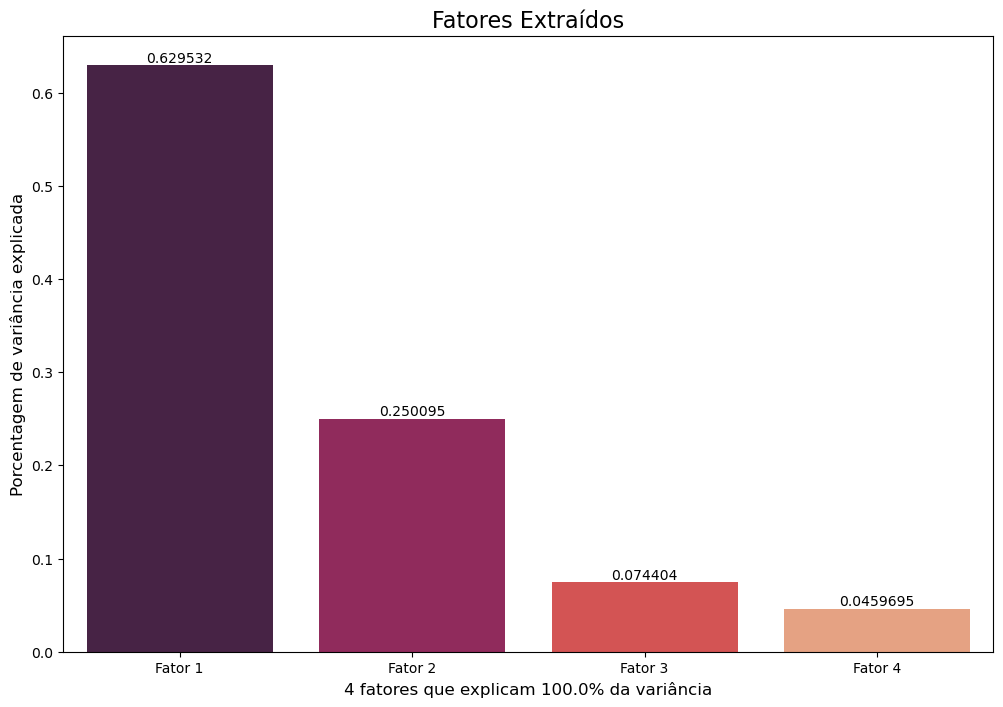

In [419]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, palette='rocket')
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraídos", fontsize=16)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()

### 10.2.6.12. Determinando as cargas fatoriais

In [422]:
cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = notas_pca.columns
tabela_cargas

,Fator 1,Fator 2,Fator 3,Fator 4
finanças,0.895398,0.007086,0.436720,0.086533
custos,0.934033,0.048581,-0.119783,-0.332978
marketing,-0.042466,0.998933,-0.000358,0.018170
atuária,0.917697,-0.010133,-0.304210,0.255315


### 10.2.6.13. Gráfico das cargas fatoriais (*loading plot*)

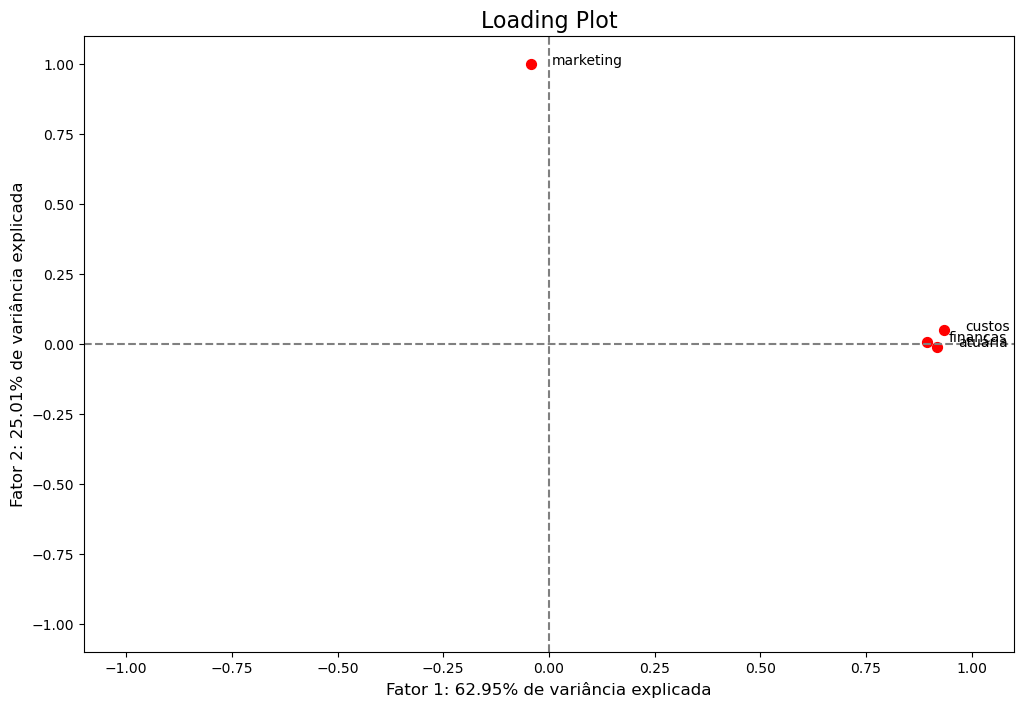

In [425]:
plt.figure(figsize=(12,8))
tabela_cargas_chart = tabela_cargas.reset_index()
plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=50, color='red')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])
plt.title("Loading Plot", fontsize=16)
plt.xlabel(f"Fator 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.ylabel(f"Fator 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.show()

### 10.2.6.14. Determinando as comunalidades

In [428]:
comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = notas_pca.columns
tabela_comunalidades

,Comunalidades
finanças,1.0
custos,1.0
marketing,1.0
atuária,1.0


### 10.2.6.15. Extração dos fatores para as observações do banco de dados

In [431]:
fatores = pd.DataFrame(fa.transform(notas_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]
fatores

,Fator 1,Fator 2,Fator 3,Fator 4
0,0.015232,-1.673452,-0.176396,0.743198
1,-1.082468,1.510196,0.344452,-0.829870
2,-0.603231,-0.607015,-0.635247,-0.670994
3,1.352586,0.891321,0.327787,-0.228435
4,-0.984279,-0.926699,0.163203,0.384190
...,...,...,...,...
95,0.121867,-0.169227,1.037620,0.456371
96,1.220881,-0.577316,-0.549185,1.961256
97,0.829146,0.499201,0.735807,0.557208
98,1.186171,-0.918969,-0.304080,1.111389


In [433]:
# Adicionando os fatores ao banco de dados
notas = pd.concat([notas.reset_index(drop=True), fatores], axis=1)
notas

,estudante,finanças,custos,marketing,atuária,Fator 1,Fator 2,Fator 3,Fator 4
0,Gabriela,5.8,4.0,1.0,6.0,0.015232,-1.673452,-0.176396,0.743198
1,Luiz Felipe,3.1,3.0,10.0,2.0,-1.082468,1.510196,0.344452,-0.829870
2,Patrícia,3.1,4.0,4.0,4.0,-0.603231,-0.607015,-0.635247,-0.670994
3,Gustavo,10.0,8.0,8.0,8.0,1.352586,0.891321,0.327787,-0.228435
4,Letícia,3.4,2.0,3.2,3.2,-0.984279,-0.926699,0.163203,0.384190
...,...,...,...,...,...,...,...,...,...
95,Sheila,7.7,4.3,5.2,5.1,0.121867,-0.169227,1.037620,0.456371
96,Pedro,9.0,6.0,4.0,9.8,1.220881,-0.577316,-0.549185,1.961256
97,Horácio,9.3,6.0,7.0,7.0,0.829146,0.499201,0.735807,0.557208
98,Leandro,9.0,6.5,3.0,9.0,1.186171,-0.918969,-0.304080,1.111389


### 10.2.6.16. Identificando os scores fatoriais

In [436]:
scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = notas_pca.columns
tabela_scores

,Fator 1,Fator 2,Fator 3,Fator 4
finanças,0.355581,0.007083,1.467395,0.470601
custos,0.370924,0.048562,-0.402475,-1.810861
marketing,-0.016864,0.998554,-0.001204,0.098814
atuária,0.364436,-0.010129,-1.022155,1.388503


In [438]:
# A seguir, verifica-se que a correlação entre os fatores é zero (ortogonais)

pg.rcorr(notas[['Fator 1','Fator 2', 'Fator 3', 'Fator 4']],
         method = 'pearson', upper = 'pval', 
         decimals = 4, 
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

C:\Users\diasr\anaconda3\Lib\site-packages\pingouin\correlation.py:1116: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,Fator 1,Fator 2,Fator 3,Fator 4
Fator 1,-,,,
Fator 2,0.0,-,,
Fator 3,-0.0,-0.0,-,
Fator 4,-0.0,0.0,0.0,-
